In [1]:
import os
os.chdir('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/Code/Library')

from ExperimentFunc import exp_func, beta_gen_mnt
from Step1 import solve_beta_mnt
from Step2 import find_v_mnt
from Step3 import solve_omega, gw_mnt, proj_mnt_tan_cone, proj_mnt_neg_tan_cone

from math import log
import numpy as np

from sklearn.isotonic import IsotonicRegression

from scipy import linalg
from scipy import stats

from collections import namedtuple

from copy import deepcopy

import matplotlib.pyplot as plt

In [2]:
Params = namedtuple('Params', ['step1', 'step2', 'step3'])

### <span style="color:purple">1) Cov(X) = I</span>

In [3]:
N = 100
n = 1000
p = 1000
Sigma_sqrt = np.eye(p)
noise_sd = 2
debias_idx = p - 1
param_set = Params([False], 
                   [], 
                   [gw_mnt, proj_mnt_tan_cone, proj_mnt_neg_tan_cone])

In [4]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_mnt, 
             solve_beta_mnt, 
             find_v_mnt, 
             solve_omega)

iter: 0
The L2 error:  0.32787734228887533
iter: 1
The L2 error:  0.3229468624892355
iter: 2
The L2 error:  0.3269129374669108
iter: 3
The L2 error:  0.28255352998417177
iter: 4
The L2 error:  0.26691820621768825
iter: 5
The L2 error:  0.2250567067882002
iter: 6
The L2 error:  0.2670794568197983
iter: 7
The L2 error:  0.35362896489156515
iter: 8
The L2 error:  0.3958945713736108
iter: 9
The L2 error:  0.42647320865204413
iter: 10
The L2 error:  0.3407881017326648
iter: 11
The L2 error:  0.4063304904305318
iter: 12
The L2 error:  0.3396229011975067
iter: 13
The L2 error:  0.23845586845692493
iter: 14
The L2 error:  0.4524604541916802
iter: 15
The L2 error:  0.3176771963348152
iter: 16
The L2 error:  0.4733123423898565
iter: 17
The L2 error:  0.27889911748126894
iter: 18
The L2 error:  0.27951154715283827
iter: 19
The L2 error:  0.32132576077027675
iter: 20
The L2 error:  0.49972275450974774
iter: 21
The L2 error:  0.31795531062345556
iter: 22
The L2 error:  0.49968485478993785
iter: 23


#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [5]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

The mean of (non_debiased_beta - beta) is:  -1.283267893560606


In [6]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

The mean of (debiased_beta - beta) is:  -0.10103587335993477


#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

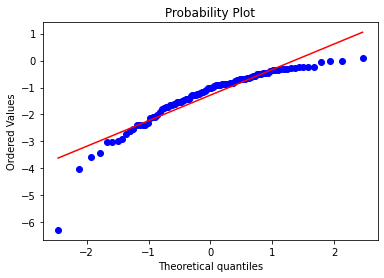

In [7]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

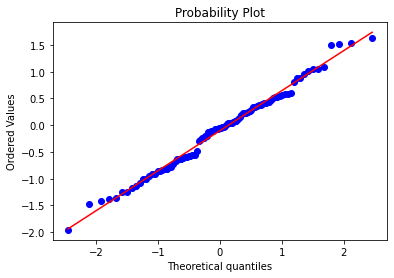

In [8]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Save the simulation results

In [24]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/MonotoneCone/identity_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/MonotoneCone/identity_z.npy', z)

###  <span style="color:purple">2) Cov(X) with bounded eigenvalues</span>

In [25]:
N = 100
n = 100
p = 100

# Generate a cov matrix with bounded eigenvalues
# generate eigenvalues
cov_eigv = np.random.uniform(low = 0.3, high = 3.0, size = (p,))
D_sqrt = np.diag(cov_eigv**0.5)
# generate an orthonormal matrix
a = np.random.normal(size = (p,p))
u, s, vh = np.linalg.svd(a.T@a, full_matrices=True)
# generate the square root of cov matrix 
Sigma_sqrt = D_sqrt @ u.T

noise_sd = 2
debias_idx = p - 1
param_set = Params([False], 
                   [], 
                   [gw_mnt, proj_mnt_tan_cone, proj_mnt_neg_tan_cone])

In [26]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_mnt, 
             solve_beta_mnt, 
             find_v_mnt, 
             solve_omega)

iter: 0
The L2 error:  1.031340529919417
iter: 1
The L2 error:  0.6427293713842692
iter: 2
The L2 error:  1.1863773721519917
iter: 3
The L2 error:  0.2100372515690627
iter: 4
The L2 error:  0.6993548547819907
iter: 5
The L2 error:  0.7992486654869984
iter: 6
The L2 error:  0.4389695298249038
iter: 7
The L2 error:  0.5705303603307218
iter: 8
The L2 error:  0.6733128803993516
iter: 9
The L2 error:  1.0317859390325341
iter: 10
The L2 error:  0.7164923030988688
iter: 11
The L2 error:  0.5660190564982541
iter: 12
The L2 error:  0.6771772752461022
iter: 13
The L2 error:  0.5385664317481336
iter: 14
The L2 error:  0.4079166291568696
iter: 15
The L2 error:  1.100450501447478
iter: 16
The L2 error:  0.41431674454542206
iter: 17
The L2 error:  1.1561082074206823
iter: 18
The L2 error:  1.2586135612193714
iter: 19
The L2 error:  0.4556282696897666
iter: 20
The L2 error:  1.215311818464768
iter: 21
The L2 error:  0.8581105866749928
iter: 22
The L2 error:  0.4220599431928323
iter: 23
The L2 error: 

#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [27]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

The mean of (non_debiased_beta - beta) is:  -0.9723051073952018


In [28]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

The mean of (debiased_beta - beta) is:  -0.12001409225894054


#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

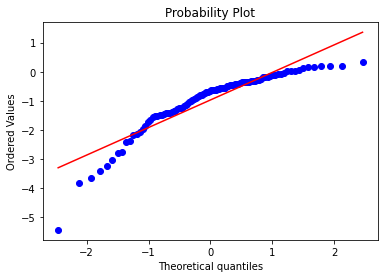

In [29]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

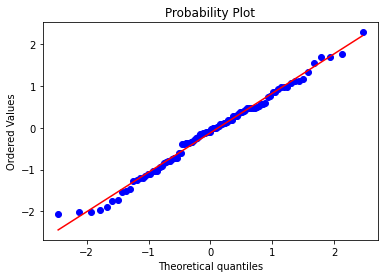

In [30]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Save the simulation results

In [31]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/MonotoneCone/ibddeig_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/MonotoneCone/bddeig_z.npy', z)

### <span style = 'color:purple'>3) Cov(X) is the Cov of AR(1) Process</span>

In [32]:
N = 100
n = 100
p = 100

# Generate the squar root of cov matrix
rho = 0.8
rho_vec = []
for i in range(p):
    rho_vec.append(rho**i)
rho_vec = np.array(rho_vec)
# The cholesky decomposition of cov == the squar root of cov
Sigma_sqrt = [rho_vec]
for i in range(1, p):
    rho_vec_shifted = np.concatenate((np.zeros(i), rho_vec[:-i]))
#     print(rho_vec_shifted)
    Sigma_sqrt.append(rho_vec_shifted * (1-rho**2)**0.5)
Sigma_sqrt = np.array(Sigma_sqrt)

noise_sd = 2
debias_idx = p - 1
param_set = Params([False], 
                   [], 
                   [gw_mnt, proj_mnt_tan_cone, proj_mnt_neg_tan_cone])

In [33]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_mnt, 
             solve_beta_mnt, 
             find_v_mnt, 
             solve_omega)

iter: 0
The L2 error:  0.4720202465899764
iter: 1
The L2 error:  0.9754743404452259
iter: 2
The L2 error:  0.2823687573084248
iter: 3
The L2 error:  1.2902526248290287
iter: 4
The L2 error:  0.49276796681037505
iter: 5
The L2 error:  1.051345364664203
iter: 6
The L2 error:  1.429497755632269
iter: 7
The L2 error:  1.2251128862764846
iter: 8
The L2 error:  0.658135350024178
iter: 9
The L2 error:  0.4212185718134397
iter: 10
The L2 error:  0.3295751545525256
iter: 11
The L2 error:  0.7598641181882032
iter: 12
The L2 error:  0.8079650216159279
iter: 13
The L2 error:  1.0935305472802392
iter: 14
The L2 error:  0.372523140231949
iter: 15
The L2 error:  1.0659944563366686
iter: 16
The L2 error:  0.7937137317445606
iter: 17
The L2 error:  0.7292933066811972
iter: 18
The L2 error:  0.5379435434086153
iter: 19
The L2 error:  0.5229964150658324
iter: 20
The L2 error:  0.5070856621474428
iter: 21
The L2 error:  1.6510611519778027
iter: 22
The L2 error:  0.6671413685331332
iter: 23
The L2 error:  

#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [34]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

The mean of (non_debiased_beta - beta) is:  -0.7022592129290665


In [35]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

The mean of (debiased_beta - beta) is:  -0.2650946677381033


#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

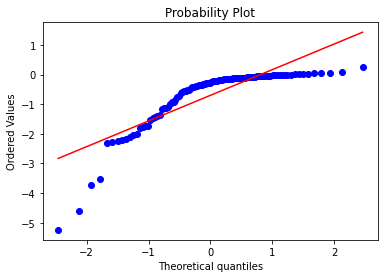

In [36]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

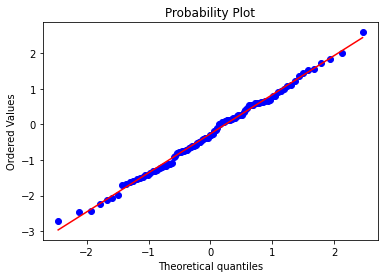

In [37]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Save the simulation results

In [38]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/MonotoneCone/ar1_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/MonotoneCone/ar1_z.npy', z)